# Numerical simulation of normalised top clone data

The file 'normalised_plaw_generator.py' allows to generate sequences of clonotype frequencies with a normalisation condition like the delta function over the joint probability and a universal power law exponent

The notebook contains:
1. Repertoire generation
2. Top clones

## Imports

- _numpy_ for math operations
- _matplotlib.pyplot_ for graphic representations
- _normalised_plaw_generator_ for numerical clonotype data simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import normalised_plaw_generator as npl

## 1. Repertoire generation

Different parameters need to be fixed to simulate strongly normalised repertoires
- *f_min* : minimum frequency of the repertoire
- *n_freqs* : total number of drawn frequencies for each simulation (size of sampled repertoire)
- *alpha* : power law characteristic exponent
- *R* : number of sequences generated
- *N* : diversity of the repertoire (fixed by 1/avg(f))
- *df* : accepted normalisation error in the final bin. Final summation is 1 +- df/2
- *n_chunks* : chunks into which the realisation is divided to save memory

### A. Choice of the parameters

In [2]:
f_min = 1/10000
n_freqs = 500000
alpha = 1.2

freqs, probs = npl.generate_plaw_dist(alpha, f_min, n_freqs)
f_av = np.sum(probs*freqs)
f_var = np.sum(probs*freqs**2) - f_av**2

R = 1000000
N = int(1/f_av) 
df = 2/10000 
n_chunks = 10

### B. Generation of the datasets

In [3]:
sampler = npl.constrained_dist_sampler(freqs, probs, N, R, final_dx = df)  # definition of the problem

ks = N - np.logspace(np.log10(2), np.log10(N), 10, dtype = int)[:-1][::-1]  # checkpoints where the sequences 
                                                                            # that cannot reach one are discarded
    
%time samples = sampler.run(ks, n_chunks)  # generator of the normalised datasets

print('Total final samples:', len(samples))
print('Non discarded fraction at each checkpoint:', sampler.fract_good_samples.mean(axis=0))

Chunk: 1 n samples: 137
Chunk: 2 n samples: 126
Chunk: 3 n samples: 151
Chunk: 4 n samples: 123
Chunk: 5 n samples: 117
Chunk: 6 n samples: 134
Chunk: 7 n samples: 131
Chunk: 8 n samples: 131
Chunk: 9 n samples: 147
Chunk: 10 n samples: 128
CPU times: user 7min 9s, sys: 1min 18s, total: 8min 27s
Wall time: 8min 28s
Total final samples: 1325
Non discarderd fraction at each checkpoint: [0.91218  0.895056 0.912292 0.9347   0.960958 0.975603 0.902332 0.711285
 0.6889  ]


## 2. Top clones

The top clone from each of the generated datasets is collected directly from the samples

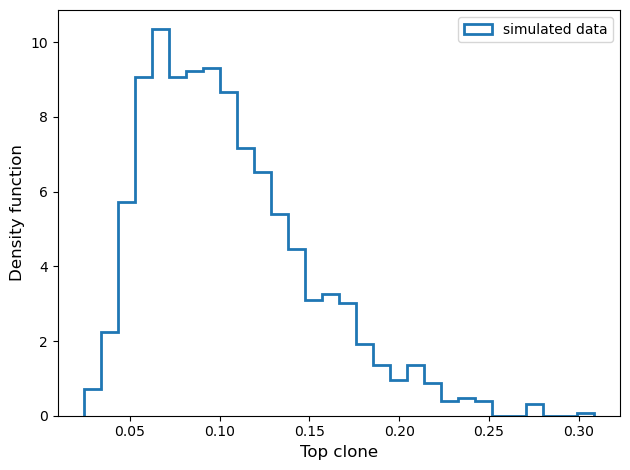

In [4]:
maxs = np.max(samples, axis = 1)  # top clones

fig, (ax1) = plt.subplots(figsize = (6.4, 4.8))  # representation

ax1.set_xlabel('Top clone', fontsize=12)
ax1.set_ylabel('Density function', fontsize = 12)
ax1.hist(maxs, bins = 30, density = True, histtype = 'step', lw=2, label = 'simulated data')
ax1.legend()

plt.tight_layout()